### Well33

Spencer Harris  
Data Analysis  
Fogland Point, Tiverton, Rhode Island, US

**The data is pressure/temperature/conductivity data collected in a domestic well at 30 minute intervals. There is also another data set that is composed of barometric pressure for compensation. The exact source of that data is from In-Situ AquaTroll 200s that I installed on Fogland Point, RI. The format of the data is CSV. Also the is Percipitation data being loaded in from a Wunderground Personal Weater Station nearby to compare against the water level data**

In [2]:
import os
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
%pwd
#os.listdir()

'/home/zonas/Documents/Projects/foglandpoint/PSet_7'

In [4]:
# name/number of the well that we are looking at in this notebook
subject_well = '33'

In [5]:
# pulling in the hard measurements (water levels retrieved with water level sounder) and well TOC elevations
man_measures = pd.read_csv('../data/All_WLs.csv', delimiter=',')
# pulling in the transducer data
barofile = '../data/troll/2017-08-17_16-05-25_fogland-point_Log_baro081717.csv'
well33file = '../data/troll/2017-08-16_18-09-51_fogland-point_Log_3rodway081617.csv'
baro = pd.read_csv(barofile, skiprows=25)
well = pd.read_csv(well33file, skiprows=25)

In [6]:
#check for size of data
print (baro.shape, well.shape)

(4122, 3) (4162, 6)


In [8]:
well[30:60]

,Date Time,Pressure (psi) (535311),Temperature (°C) (535311),Actual Conductivity (µS/cm) (535311),Specific Conductivity (µS/cm) (535311),Salinity (PSU) (535311)
30,2017-08-17 09:09:51.491,23.84580,11.68027,12279.40,16469.31,9.633535
31,2017-08-17 09:39:51.491,23.83716,11.68035,12277.87,16467.22,9.632214
32,2017-08-17 10:09:51.491,23.83613,11.68035,12277.95,16467.33,9.632283
33,2017-08-17 10:39:51.491,23.82495,11.68072,12283.24,16474.27,9.636679
34,2017-08-17 11:09:51.491,23.81416,11.68089,12281.03,16471.22,9.634759
35,2017-08-17 11:39:51.491,23.80641,11.68125,12282.49,16473.04,9.635916
36,2017-08-17 12:09:51.491,23.80050,11.68135,12286.92,16478.93,9.639647
37,2017-08-17 12:39:51.491,23.79322,11.68353,12286.72,16477.74,9.638950
38,2017-08-17 13:09:51.491,23.78602,11.68135,12285.50,16477.02,9.638439
39,2017-08-17 13:39:51.491,23.78289,11.68243,12287.19,16478.83,9.639610


Since the two data frames are of different sizes we need to inspect them and try to line/match them up temporally the best we can. This shouldn't be too hard because both of the files have one measurement every 30 minutes. If the two files' temporal resolution was different then it would be more difficult

In [43]:
baro[:10]

,Date Time,Pressure (psi) (525373),Temperature (°C) (525373)
0,2017-08-17 16:05:25.278,14.71757,20.58728
1,2017-08-17 16:35:25.278,14.71992,19.49414
2,2017-08-17 17:05:25.278,14.72049,18.43887
3,2017-08-17 17:35:25.278,14.71942,18.11523
4,2017-08-17 18:05:25.278,14.71662,18.02957
5,2017-08-17 18:35:25.278,14.72028,18.01942
6,2017-08-17 19:05:25.278,14.71957,17.98892
7,2017-08-17 19:35:25.278,14.72536,18.00272
8,2017-08-17 20:05:25.278,14.73132,18.00127
9,2017-08-17 20:35:25.278,14.72902,17.99982


So if we inspect the data we note that the 44th row/measurement of `well33` actually matches up with the 0th row/measurement of `baro`  
If we shift `well33` by 44 rows the two should match up quite nicely

In [11]:
#matching up our readings/indicies
well = well.shift(-44)

In [13]:
well[:10]

,Date Time,Pressure (psi) (535311),Temperature (°C) (535311),Actual Conductivity (µS/cm) (535311),Specific Conductivity (µS/cm) (535311),Salinity (PSU) (535311)
0,2017-08-17 16:09:51.491,23.79852,11.68326,12289.84,16482.04,9.641663
1,2017-08-17 16:39:51.491,23.80490,11.68326,12296.10,16490.44,9.646975
2,2017-08-17 17:09:51.491,23.80490,11.68399,12296.17,16490.23,9.646855
3,2017-08-17 17:39:51.491,23.81243,11.68389,12296.43,16490.62,9.647099
4,2017-08-17 18:09:51.491,23.81383,11.68408,12294.12,16487.44,9.645092
5,2017-08-17 18:39:51.491,23.81577,11.68471,12293.79,16486.73,9.644667
6,2017-08-17 19:09:51.491,23.81753,11.68497,12296.61,16490.39,9.646984
7,2017-08-17 19:39:51.491,23.82495,11.68516,12296.36,16489.99,9.646731
8,2017-08-17 20:09:51.491,23.82407,11.68516,12298.66,16493.06,9.648679
9,2017-08-17 20:39:51.491,23.82604,11.68562,12296.50,16489.98,9.646741


In [14]:
print(well.columns)
print(baro.columns)

Index(['Date Time', 'Pressure (psi) (535311)', 'Temperature (°C) (535311)',
       'Actual Conductivity (µS/cm) (535311)',
       'Specific Conductivity (µS/cm) (535311)', 'Salinity (PSU) (535311)'],
      dtype='object')
Index(['Date Time', 'Pressure (psi) (525373)', 'Temperature (°C) (525373)'], dtype='object')


**"manual" barometric compensation** derived from [In-Situ Inc.](https://in-situ.com/wp-content/uploads/2014/11/Manual-Level-Mode-Correction-for-Non-Vented-Sensors.pdf)  

Basic idea: Depth is the amount of water over the pressure sensor plus barometric pressure.  

Water level can be calculated in meters using the following equation: D = (0.703073 X (Pm-Bm)) / SG

In [15]:
well['compd_(psi)']  = well['Pressure (psi) (535311)'].sub(baro['Pressure (psi) (525373)'].squeeze())
well['baro_reading'] = baro['Pressure (psi) (525373)']
Lr = man_measures
# Lr = reference level
well['Transducer_level_ft'] = (well['compd_(psi)'] * 2.30666) 
well['water_level_ft_LMSL'] = (Lr.iloc[0][' TOC Elevation (LSML)']) - (well['compd_(psi)'] * 2.30666)

Below the date/time is being converted into a format that Pandas can read and then it is being assigned as the index for the data frames

In [16]:
well['Datetime'] = pd.to_datetime(well['Date Time'], errors='coerce')
well = well.set_index('Datetime')
well = well.drop('Date Time', 1)

baro['Datetime'] = pd.to_datetime(baro['Date Time'], errors='coerce')
baro = baro.set_index('Datetime')
baro= baro.drop('Date Time', 1)

In [17]:
well[:10]

,Pressure (psi) (535311),Temperature (°C) (535311),Actual Conductivity (µS/cm) (535311),Specific Conductivity (µS/cm) (535311),Salinity (PSU) (535311),compd_(psi),baro_reading,Transducer_level_ft,water_level_ft_LMSL
Datetime,,,,,,,,,
2017-08-17 16:09:51.491,23.79852,11.68326,12289.84,16482.04,9.641663,9.08095,14.71757,20.946664,0.585236
2017-08-17 16:39:51.491,23.80490,11.68326,12296.10,16490.44,9.646975,9.08498,14.71992,20.955960,0.575940
2017-08-17 17:09:51.491,23.80490,11.68399,12296.17,16490.23,9.646855,9.08441,14.72049,20.954645,0.577255
2017-08-17 17:39:51.491,23.81243,11.68389,12296.43,16490.62,9.647099,9.09301,14.71942,20.974482,0.557418
2017-08-17 18:09:51.491,23.81383,11.68408,12294.12,16487.44,9.645092,9.09721,14.71662,20.984170,0.547730
2017-08-17 18:39:51.491,23.81577,11.68471,12293.79,16486.73,9.644667,9.09549,14.72028,20.980203,0.551697
2017-08-17 19:09:51.491,23.81753,11.68497,12296.61,16490.39,9.646984,9.09796,14.71957,20.985900,0.546000
2017-08-17 19:39:51.491,23.82495,11.68516,12296.36,16489.99,9.646731,9.09959,14.72536,20.989660,0.542240
2017-08-17 20:09:51.491,23.82407,11.68516,12298.66,16493.06,9.648679,9.09275,14.73132,20.973883,0.558017


In [18]:
man_measures['Datetime'] = pd.to_datetime(man_measures['Date Time'])
man_measures = man_measures.set_index('Datetime')
man_measures= man_measures.drop(('Date Time'), 1)
man_measures= man_measures.drop(('date'), 1)
man_measures= man_measures.drop(('time'), 1)
# combine the above three lines into 1 using a list
man_measures.columns


Index(['well', 'lat ', 'lon', 'feet below TOC', ' TOC Elevation (LSML)',
       'Water level above LMSL'],
      dtype='object')

Below we have selected out the manual reading that pertain to the `subject_well` we are currently looking at  

The next level of efficency here would be to have the script automatically select where the transducer data matches with (is within 29 minutes) of a manual level.  

But we are just going to look above and pick which row corresponds with the first few transducer readings.

In [19]:
well_measures = man_measures.loc[man_measures['well'].str.contains(subject_well)==True, : ]
well_measures

,well,lat,lon,feet below TOC,TOC Elevation (LSML),Water level above LMSL
Datetime,,,,,,
2017-06-17 15:20:00,33,41.561014,-71.219101,10.44,12.129,1.689
2017-08-16 15:20:00,33,41.561014,-71.219101,11.20,12.129,0.929
2017-08-16 19:29:00,33,41.561014,-71.219101,11.14,12.129,0.989
2017-08-18 08:55:00,33,41.561014,-71.219101,11.15,12.129,0.979
2017-11-11 09:10:00,33,41.561014,-71.219101,10.27,12.129,1.859


#### specific to this well
In this case (subject_well = '56') we are picking row 2 which has a Datetime index of `2017-08-17 17:39:00` which matches up nicely with the transducer's 3rd reading, seen on row 2 of the `well56` dataframe, which has a Datetime index of `2017-08-17 17:34:14.116`   

We will use the manual measurement to come up with our transducer's setting in the well (`man_measures`'s **feet below TOC** + `well56`'s **Transducer_level_ft**)

In [20]:
transducer_set = well_measures.iloc[2]['feet below TOC'] + well.iloc[7]['Transducer_level_ft']
transducer_set

32.129660269400006

In [21]:
well['calculated_depth'] = transducer_set - well['Transducer_level_ft'] 
well['GW_elevation_ft_(LSML)'] = well_measures.iloc[2][' TOC Elevation (LSML)'] - well['calculated_depth']
well[:]

,Pressure (psi) (535311),Temperature (°C) (535311),Actual Conductivity (µS/cm) (535311),Specific Conductivity (µS/cm) (535311),Salinity (PSU) (535311),compd_(psi),baro_reading,Transducer_level_ft,water_level_ft_LMSL,calculated_depth,GW_elevation_ft_(LSML)
Datetime,,,,,,,,,,,
2017-08-17 16:09:51.491,23.79852,11.68326,12289.84,16482.04,9.641663,9.08095,14.71757,20.946664,0.585236,11.182996,0.946004
2017-08-17 16:39:51.491,23.80490,11.68326,12296.10,16490.44,9.646975,9.08498,14.71992,20.955960,0.575940,11.173700,0.955300
2017-08-17 17:09:51.491,23.80490,11.68399,12296.17,16490.23,9.646855,9.08441,14.72049,20.954645,0.577255,11.175015,0.953985
2017-08-17 17:39:51.491,23.81243,11.68389,12296.43,16490.62,9.647099,9.09301,14.71942,20.974482,0.557418,11.155178,0.973822
2017-08-17 18:09:51.491,23.81383,11.68408,12294.12,16487.44,9.645092,9.09721,14.71662,20.984170,0.547730,11.145490,0.983510
2017-08-17 18:39:51.491,23.81577,11.68471,12293.79,16486.73,9.644667,9.09549,14.72028,20.980203,0.551697,11.149457,0.979543
2017-08-17 19:09:51.491,23.81753,11.68497,12296.61,16490.39,9.646984,9.09796,14.71957,20.985900,0.546000,11.143760,0.985240
2017-08-17 19:39:51.491,23.82495,11.68516,12296.36,16489.99,9.646731,9.09959,14.72536,20.989660,0.542240,11.140000,0.989000
2017-08-17 20:09:51.491,23.82407,11.68516,12298.66,16493.06,9.648679,9.09275,14.73132,20.973883,0.558017,11.155778,0.973222


In [22]:
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import numpy as np
% matplotlib inline

(0, 15)

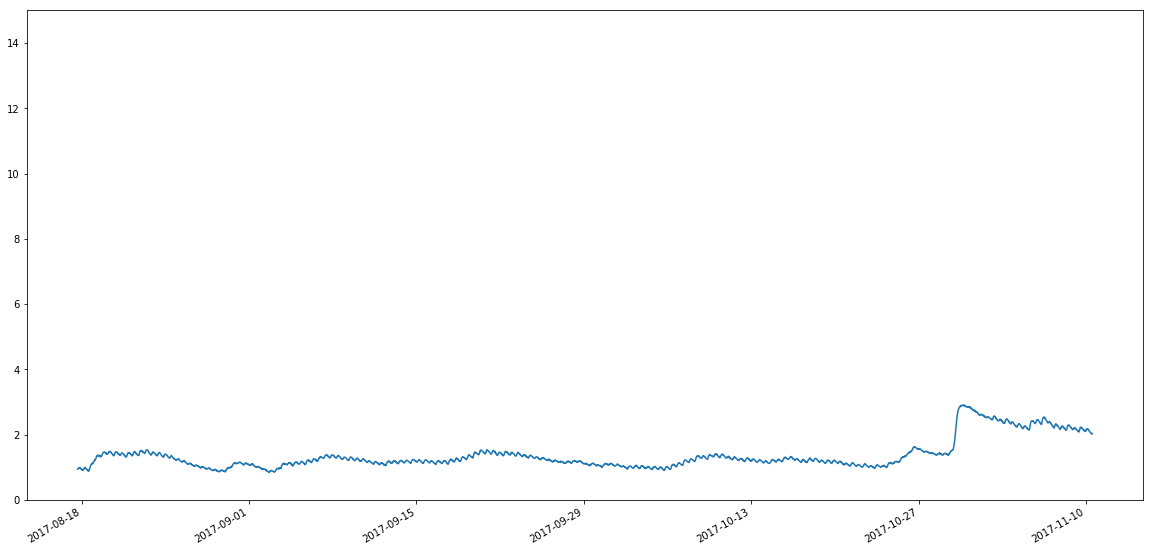

In [23]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(well['GW_elevation_ft_(LSML)'])
fig.autofmt_xdate()
plt.ylim(0,15)

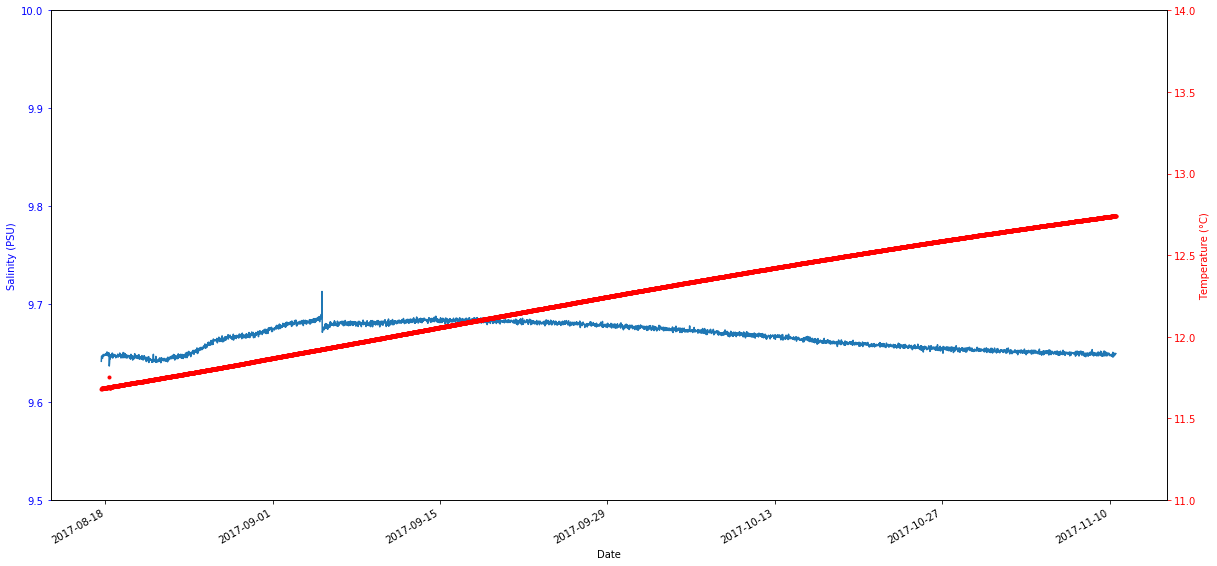

In [24]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(well['Salinity (PSU) (535311)'])
ax1.set_xlabel('Date')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Salinity (PSU)', color='b')
ax1.tick_params('y', colors='b')
plt.ylim(9.5,10)

ax2 = ax1.twinx()
s2 = well['Temperature (°C) (535311)']
ax2.plot(s2, 'r.')
ax2.set_ylabel('Temperature (°C)', color='r')
ax2.tick_params('y', colors='r')
plt.ylim(11,14)

fig.autofmt_xdate()
fig.autofmt_xdate()
plt.show()

### Fetching Precipitation from Wunderground
modified from https://www.shanelynn.ie/analysis-of-weather-data-using-pandas-python-and-seaborn/  

we are going to use this https://www.wunderground.com/personal-weather-station/dashboard?ID=KRIPORTS37#history/s20171019/e20171118/mmonth weather station

In [25]:
import requests
import pandas as pd
from dateutil import parser, rrule
from datetime import datetime, time, date
import time
import io

In [26]:
def getRainfallData(station, day, month, year):
    """
    Function to return a data frame of minute-level weather data for a single Wunderground PWS station.
    
    Args:
        station (string): Station code from the Wunderground website
        day (int): Day of month for which data is requested
        month (int): Month for which data is requested
        year (int): Year for which data is requested
    
    Returns:
        Pandas Dataframe with weather data for specified station and date.
    """
    url = "http://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID={station}&day={day}&month={month}&year={year}&graphspan=day&format=1"
    full_url = url.format(station=station, day=day, month=month, year=year)
    # Request data from wunderground data
    response = requests.get(full_url, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})
    data = response.text
    # remove the excess <br> from the text data
    data = data.replace('<br>', '')
    # Convert to pandas dataframe (fails if issues with weather station)
    try:
        dataframe = pd.read_csv(io.StringIO(data), index_col=False)
        dataframe['station'] = station
    except Exception as e:
        print("Issue with date: {}-{}-{} for station {}".format(day,month,year, station))
        return None
    return dataframe

In [27]:
# Generate a list of all of the dates we want data for
start_date = "2017-08-01"
end_date = "2017-11-17"
start = parser.parse(start_date)
end = parser.parse(end_date)
dates = list(rrule.rrule(rrule.DAILY, dtstart=start, until=end))

# Create a list of stations here to download data for
stations = ["KRIPORTS37"]
# Set a backoff time in seconds if a request fails
backoff_time = 10
data = {}

In [24]:
# Gather data for each station in turn and save to CSV.
for station in stations:
    print("Working on {}".format(station))
    data[station] = []
    for date in dates:
        # Print period status update messages
        if date.day % 10 == 0:
            print("Working on date: {} for station {}".format(date, station))
        done = False
        while done == False:
            try:
                weather_data = getRainfallData(station, date.day, date.month, date.year)
                done = True
            except ConnectionError as e:
                # May get rate limited by Wunderground.com, backoff if so.
                print("Got connection error on {}".format(date))
                print("Will retry in {} seconds".format(backoff_time))
                time.sleep(10)
        # Add each processed date to the overall data
        data[station].append(weather_data)
    # Finally combine all of the individual days and output to CSV for analysis.
    pd.concat(data[station]).to_csv("./{}_weather.csv".format(station))

Working on KRIPORTS37
Working on date: 2017-08-10 00:00:00 for station KRIPORTS37
Working on date: 2017-08-20 00:00:00 for station KRIPORTS37
Working on date: 2017-08-30 00:00:00 for station KRIPORTS37
Working on date: 2017-09-10 00:00:00 for station KRIPORTS37
Working on date: 2017-09-20 00:00:00 for station KRIPORTS37
Working on date: 2017-09-30 00:00:00 for station KRIPORTS37
Working on date: 2017-10-10 00:00:00 for station KRIPORTS37
Working on date: 2017-10-20 00:00:00 for station KRIPORTS37
Working on date: 2017-10-30 00:00:00 for station KRIPORTS37
Working on date: 2017-11-10 00:00:00 for station KRIPORTS37


In [28]:
station = 'KRIPORTS37' # Sandy Point Farm, across the channel from Fogland Point
data_raw = pd.read_csv('./{}_weather.csv'.format(station))
data_raw.columns

Index(['Unnamed: 0', 'Time', 'TemperatureF', 'DewpointF', 'PressureIn',
       'WindDirection', 'WindDirectionDegrees', 'WindSpeedMPH',
       'WindSpeedGustMPH', 'Humidity', 'HourlyPrecipIn', 'Conditions',
       'Clouds', 'dailyrainin', 'SolarRadiationWatts/m^2', 'SoftwareType',
       'DateUTC', 'station'],
      dtype='object')

In [29]:
# Give the variables some friendlier names and convert types as necessary.
data_raw['temp'] = data_raw['TemperatureF'].astype(float)
data_raw['rain'] = data_raw['HourlyPrecipIn'].astype(float)
data_raw['date'] = data_raw['DateUTC'].apply(parser.parse)
data_raw['humidity'] = data_raw['Humidity'].astype(float)
data_raw['wind_direction'] = data_raw['WindDirectionDegrees']
data_raw['wind'] = data_raw['WindSpeedMPH']
 
# Extract out only the data we need.
data = data_raw.loc[:, ['date', 'station', 'temp', 'rain', 'humidity', 'wind']]
data = data[(data['date'] >= datetime(2017,8,2)) & (data['date'] <= datetime(2017,11,16))]
 
# There's an issue with some stations that record rainfall ~-2500 where data is missing.
if (data['rain'] < -500).sum() > 10:
    print("There's more than 10 messed up days for {}".format(station))
    
# remove the bad samples
data = data[data['rain'] > -500]
 
# Assign the "day" to every date entry
data['day'] = data['date'].apply(lambda x: x.date())
 
# Get the time, day, and hour of each timestamp in the dataset
data['time_of_day'] = data['date'].apply(lambda x: x.time())
data['day_of_week'] = data['date'].apply(lambda x: x.weekday())    
data['hour_of_day'] = data['time_of_day'].apply(lambda x: x.hour)
# Mark the month for each entry so we can look at monthly patterns
data['month'] = data['date'].apply(lambda x: x.month)

What does this data look like?

In [30]:
! cat KRIPORTS37_weather.csv

,Time,TemperatureF,DewpointF,PressureIn,WindDirection,WindDirectionDegrees,WindSpeedMPH,WindSpeedGustMPH,Humidity,HourlyPrecipIn,Conditions,Clouds,dailyrainin,SolarRadiationWatts/m^2,SoftwareType,DateUTC,station
0,2017-08-01 00:00:00,66.2,8.1,30.02,South,185,0.9,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:00:00,KRIPORTS37
1,2017-08-01 00:05:00,66.2,8.1,30.01,South,185,1.6,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:05:00,KRIPORTS37
2,2017-08-01 00:10:00,66.2,8.1,30.02,South,185,1.1,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:10:00,KRIPORTS37
3,2017-08-01 00:16:00,66.2,8.1,30.02,South,181,0.9,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:16:00,KRIPORTS37
4,2017-08-01 00:21:00,66.2,8.1,30.02,South,182,1.6,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:21:00,KRIPORTS37
5,2017-08-01 00:22:00,66.2,8.1,30.01,South,182,2.2,3.4,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-01 04:22:00,KRIPORTS37
6,2017-08-01 00:27:00,66.4,8.2,30.01,South,187,2.2

27,2017-08-09 02:18:00,63.3,63.0,30.07,SSW,200,1.1,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 06:18:00,KRIPORTS37
28,2017-08-09 02:23:00,63.5,63.1,30.08,SSW,200,1.1,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 06:23:00,KRIPORTS37
29,2017-08-09 02:28:00,63.5,63.1,30.08,SSW,200,0.7,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 06:28:00,KRIPORTS37
30,2017-08-09 02:33:00,63.3,63.0,30.08,SSW,200,1.3,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 06:33:00,KRIPORTS37
31,2017-08-09 02:38:00,63.3,63.0,30.08,SSW,200,0.7,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 06:38:00,KRIPORTS37
32,2017-08-09 02:43:00,63.3,63.0,30.07,SSW,196,2.0,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 06:43:00,KRIPORTS37
33,2017-08-09 02:48:00,63.5,63.1,30.07,SSW,197,0.7,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 06:48:00,KRIPORTS37
34,2017-08-09 02:53:00,63.5,63.1,30.08,SSW,197,1.3,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-09 06:53:00,KRIPORTS37
35,2017-08-09 02

142,2017-08-12 11:58:00,66.2,8.1,29.95,NNE,18,0.0,0.0,10,0.0,,,0.46,143.5,WeatherSmart%V1.7.0,2017-08-12 15:58:00,KRIPORTS37
143,2017-08-12 12:04:00,66.6,8.4,29.95,NNE,17,2.5,3.4,10,0.0,,,0.46,150.96,WeatherSmart%V1.7.0,2017-08-12 16:04:00,KRIPORTS37
144,2017-08-12 12:09:00,66.6,8.4,29.95,NNE,18,0.4,1.1,10,0.0,,,0.46,152.68,WeatherSmart%V1.7.0,2017-08-12 16:09:00,KRIPORTS37
145,2017-08-12 12:14:00,66.4,8.2,29.95,NNE,18,0.0,0.0,10,0.0,,,0.46,135.67,WeatherSmart%V1.7.0,2017-08-12 16:14:00,KRIPORTS37
146,2017-08-12 12:19:00,66.7,8.4,29.96,NNE,18,0.9,1.1,10,0.0,,,0.46,210.78,WeatherSmart%V1.7.0,2017-08-12 16:19:00,KRIPORTS37
147,2017-08-12 12:24:00,66.7,8.4,29.95,NNE,18,0.0,0.0,10,0.0,,,0.46,246.39,WeatherSmart%V1.7.0,2017-08-12 16:24:00,KRIPORTS37
148,2017-08-12 12:29:00,67.5,9.0,29.95,NNE,18,0.0,0.0,10,0.0,,,0.46,211.64,WeatherSmart%V1.7.0,2017-08-12 16:29:00,KRIPORTS37
149,2017-08-12 12:34:00,67.5,9.0,29.95,NNE,18,0.9,1.1,10,0.0,,,0.46,188.27,WeatherSmart%V1.7.0,2017-08-12 16:34:00,KRIP

99,2017-08-16 08:25:00,70.0,10.9,29.91,East,90,0.9,1.1,10,0.0,,,0.01,75.85,WeatherSmart%V1.7.0,2017-08-16 12:25:00,KRIPORTS37
100,2017-08-16 08:30:00,70.3,11.3,29.9,ENE,69,0.7,1.1,10,0.0,,,0.01,75.85,WeatherSmart%V1.7.0,2017-08-16 12:30:00,KRIPORTS37
101,2017-08-16 08:35:00,70.9,11.7,29.9,ENE,69,0.7,1.1,10,0.0,,,0.01,77.19,WeatherSmart%V1.7.0,2017-08-16 12:35:00,KRIPORTS37
102,2017-08-16 08:40:00,71.1,11.8,29.91,ENE,78,2.2,3.4,10,0.0,,,0.01,81.1,WeatherSmart%V1.7.0,2017-08-16 12:40:00,KRIPORTS37
103,2017-08-16 08:45:00,71.4,12.0,29.9,ENE,65,2.5,3.4,10,0.0,,,0.01,82.33,WeatherSmart%V1.7.0,2017-08-16 12:45:00,KRIPORTS37
104,2017-08-16 08:51:00,71.6,12.2,29.92,ENE,76,2.9,3.4,10,0.0,,,0.01,89.31,WeatherSmart%V1.7.0,2017-08-16 12:51:00,KRIPORTS37
105,2017-08-16 08:56:00,71.6,12.2,29.91,ENE,74,1.8,2.2,10,0.0,,,0.01,91.87,WeatherSmart%V1.7.0,2017-08-16 12:56:00,KRIPORTS37
106,2017-08-16 09:01:00,72.0,12.6,29.91,ENE,69,1.6,2.2,10,0.0,,,0.01,100.56,WeatherSmart%V1.7.0,2017-08-16 13:01:00,KRIPOR

10,2017-08-20 00:56:00,70.9,11.7,29.87,SSW,209,2.5,3.4,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-20 04:56:00,KRIPORTS37
11,2017-08-20 01:01:00,71.2,12.0,29.87,SSW,204,2.2,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-20 05:01:00,KRIPORTS37
12,2017-08-20 01:06:00,71.1,11.8,29.87,SSW,204,1.8,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-20 05:06:00,KRIPORTS37
13,2017-08-20 01:11:00,71.2,12.0,29.87,SSW,204,2.2,3.4,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-20 05:11:00,KRIPORTS37
14,2017-08-20 01:16:00,71.2,12.0,29.86,SSW,199,1.1,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-20 05:16:00,KRIPORTS37
15,2017-08-20 01:21:00,71.2,12.0,29.87,SSW,204,2.2,3.4,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-20 05:21:00,KRIPORTS37
16,2017-08-20 01:26:00,71.2,12.0,29.87,SSW,203,1.8,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-20 05:26:00,KRIPORTS37
17,2017-08-20 01:31:00,71.2,12.0,29.86,SSW,202,1.1,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-20 05:31:00,KRIPORTS37
18,2017-08-20 01

271,2017-08-23 23:24:00,62.6,5.4,29.85,SSE,154,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-24 03:24:00,KRIPORTS37
272,2017-08-23 23:29:00,62.6,5.4,29.85,SSE,154,0.7,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-24 03:29:00,KRIPORTS37
273,2017-08-23 23:34:00,63.0,5.5,29.85,SSE,154,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-24 03:34:00,KRIPORTS37
274,2017-08-23 23:40:00,62.2,5.0,29.85,SSE,154,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-24 03:40:00,KRIPORTS37
275,2017-08-23 23:45:00,61.7,4.6,29.85,SSE,154,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-24 03:45:00,KRIPORTS37
276,2017-08-23 23:50:00,61.7,4.6,29.85,SSE,154,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-24 03:50:00,KRIPORTS37
277,2017-08-23 23:55:00,61.9,4.8,29.86,SSE,154,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-24 03:55:00,KRIPORTS37
0,2017-08-24 00:00:00,61.5,4.5,29.85,SSE,154,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-24 04:00:00,KRIPORTS37
1,2017-08-24 00:05

11,2017-08-28 01:00:00,59.0,2.5,30.28,WSW,237,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-28 05:00:00,KRIPORTS37
12,2017-08-28 01:05:00,58.6,2.3,30.26,WSW,237,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-28 05:05:00,KRIPORTS37
13,2017-08-28 01:10:00,58.6,2.3,30.27,SW,236,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-28 05:10:00,KRIPORTS37
14,2017-08-28 01:16:00,57.7,1.6,30.27,SW,236,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-28 05:16:00,KRIPORTS37
15,2017-08-28 01:21:00,57.6,1.4,30.26,SW,236,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-28 05:21:00,KRIPORTS37
16,2017-08-28 01:26:00,57.6,1.4,30.27,WSW,237,0.9,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-28 05:26:00,KRIPORTS37
17,2017-08-28 01:31:00,57.9,1.8,30.27,WSW,237,0.7,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-28 05:31:00,KRIPORTS37
18,2017-08-28 01:36:00,58.1,1.8,30.27,WSW,237,0.4,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-08-28 05:36:00,KRIPORTS37
19,2017-08-28 01:41:00,58.3

147,2017-08-31 12:30:00,77.9,69.4,29.82,SSW,208,2.0,2.2,75,0.0,,,0.0,683.24,WeatherSmart%V1.7.0,2017-08-31 16:30:00,KRIPORTS37
148,2017-08-31 12:35:00,78.1,69.6,29.82,SSW,195,1.3,2.2,75,0.0,,,0.0,700.13,WeatherSmart%V1.7.0,2017-08-31 16:35:00,KRIPORTS37
149,2017-08-31 12:40:00,78.3,68.9,29.83,West,267,1.8,2.2,73,0.0,,,0.0,697.92,WeatherSmart%V1.7.0,2017-08-31 16:40:00,KRIPORTS37
150,2017-08-31 12:45:00,78.4,68.7,29.82,SSW,208,2.0,2.2,72,0.0,,,0.0,697.92,WeatherSmart%V1.7.0,2017-08-31 16:45:00,KRIPORTS37
151,2017-08-31 12:48:00,78.6,68.9,29.83,NE,41,2.0,3.4,72,0.0,,,0.0,698.78,WeatherSmart%V1.7.0,2017-08-31 16:48:00,KRIPORTS37
152,2017-08-31 12:53:00,79.0,68.4,29.82,SW,216,3.8,5.8,70,0.0,,,0.0,692.3,WeatherSmart%V1.7.0,2017-08-31 16:53:00,KRIPORTS37
153,2017-08-31 12:58:00,78.8,68.7,29.82,NE,43,0.9,1.1,71,0.0,,,0.0,704.9,WeatherSmart%V1.7.0,2017-08-31 16:58:00,KRIPORTS37
154,2017-08-31 13:03:00,79.0,68.4,29.84,SSE,148,1.3,2.2,70,0.0,,,0.0,713.58,WeatherSmart%V1.7.0,2017-08-31 17:03:00,K

111,2017-09-03 09:30:00,58.3,57.9,29.98,NNW,347,2.9,6.9,99,0.0,,,0.42,48.56,WeatherSmart%V1.7.0,2017-09-03 13:30:00,KRIPORTS37
112,2017-09-03 09:35:00,58.1,57.7,29.98,East,100,2.7,3.4,99,0.0,,,0.42,35.48,WeatherSmart%V1.7.0,2017-09-03 13:35:00,KRIPORTS37
113,2017-09-03 09:40:00,58.3,57.9,29.98,NE,48,2.5,3.4,99,0.0,,,0.42,61.53,WeatherSmart%V1.7.0,2017-09-03 13:40:00,KRIPORTS37
114,2017-09-03 09:45:00,58.5,58.1,29.97,ENE,59,2.9,4.5,99,0.0,,,0.42,48.07,WeatherSmart%V1.7.0,2017-09-03 13:45:00,KRIPORTS37
115,2017-09-03 09:50:00,58.5,58.1,29.97,North,6,6.3,11.4,99,0.05,,,0.43,73.65,WeatherSmart%V1.7.0,2017-09-03 13:50:00,KRIPORTS37
116,2017-09-03 09:55:00,58.6,58.3,29.96,NNE,33,3.6,6.9,99,0.05,,,0.43,50.65,WeatherSmart%V1.7.0,2017-09-03 13:55:00,KRIPORTS37
117,2017-09-03 10:00:00,58.8,58.5,29.97,East,80,1.8,2.2,99,0.0,,,0.43,55.9,WeatherSmart%V1.7.0,2017-09-03 14:00:00,KRIPORTS37
118,2017-09-03 10:06:00,58.8,58.5,29.96,WNW,291,2.9,4.5,99,0.0,,,0.43,55.05,WeatherSmart%V1.7.0,2017-09-03 14:06

108,2017-09-06 09:10:00,71.1,70.7,29.88,SW,222,4.0,6.9,99,0.0,,,0.0,81.48,WeatherSmart%V1.7.0,2017-09-06 13:10:00,KRIPORTS37
109,2017-09-06 09:15:00,70.9,70.5,29.89,South,182,2.7,3.4,99,0.0,,,0.0,79.27,WeatherSmart%V1.7.0,2017-09-06 13:15:00,KRIPORTS37
110,2017-09-06 09:20:00,70.9,70.5,29.88,SSW,210,2.9,3.4,99,0.0,,,0.0,119.64,WeatherSmart%V1.7.0,2017-09-06 13:20:00,KRIPORTS37
111,2017-09-06 09:25:00,71.2,70.9,29.88,SSW,200,3.6,4.5,99,0.0,,,0.0,169.56,WeatherSmart%V1.7.0,2017-09-06 13:25:00,KRIPORTS37
112,2017-09-06 09:31:00,71.6,71.2,29.89,SSW,202,2.5,4.5,99,0.0,,,0.0,149.98,WeatherSmart%V1.7.0,2017-09-06 13:31:00,KRIPORTS37
113,2017-09-06 09:36:00,72.0,71.6,29.89,SW,235,2.2,2.2,99,0.0,,,0.0,197.81,WeatherSmart%V1.7.0,2017-09-06 13:36:00,KRIPORTS37
114,2017-09-06 09:41:00,72.5,12.9,29.89,SSW,207,2.5,3.4,10,0.0,,,0.0,204.3,WeatherSmart%V1.7.0,2017-09-06 13:41:00,KRIPORTS37
115,2017-09-06 09:47:00,72.9,13.1,29.89,SSW,209,2.2,3.4,10,0.0,,,0.0,209.93,WeatherSmart%V1.7.0,2017-09-06 13:47:0

260,2017-09-08 22:04:00,60.8,3.9,30.1,South,190,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-09 02:04:00,KRIPORTS37
261,2017-09-08 22:09:00,60.4,3.6,30.11,South,190,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-09 02:09:00,KRIPORTS37
262,2017-09-08 22:14:00,60.3,3.6,30.11,South,190,1.1,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-09 02:14:00,KRIPORTS37
263,2017-09-08 22:20:00,60.6,3.7,30.11,South,190,0.9,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-09 02:20:00,KRIPORTS37
264,2017-09-08 22:25:00,60.3,3.6,30.11,South,190,0.9,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-09 02:25:00,KRIPORTS37
265,2017-09-08 22:30:00,60.3,3.6,30.11,South,190,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-09 02:30:00,KRIPORTS37
266,2017-09-08 22:35:00,59.9,3.2,30.11,South,190,1.3,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-09 02:35:00,KRIPORTS37
267,2017-09-08 22:38:00,59.7,3.0,30.11,South,190,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-09 02:38:00,KRIPORTS37
2

157,2017-09-11 13:23:00,74.1,59.0,30.18,East,101,2.2,3.4,59,0.0,,,0.0,612.53,WeatherSmart%V1.7.0,2017-09-11 17:23:00,KRIPORTS37
158,2017-09-11 13:28:00,74.3,59.0,30.18,ESE,117,1.3,2.2,59,0.0,,,0.0,556.99,WeatherSmart%V1.7.0,2017-09-11 17:28:00,KRIPORTS37
159,2017-09-11 13:34:00,74.5,58.8,30.18,ENE,57,0.2,1.1,58,0.0,,,0.0,576.08,WeatherSmart%V1.7.0,2017-09-11 17:34:00,KRIPORTS37
160,2017-09-11 13:39:00,75.4,59.2,30.18,ENE,57,1.3,2.2,57,0.0,,,0.0,620.73,WeatherSmart%V1.7.0,2017-09-11 17:39:00,KRIPORTS37
161,2017-09-11 13:44:00,74.7,59.0,30.18,NE,46,2.0,2.2,58,0.0,,,0.0,367.01,WeatherSmart%V1.7.0,2017-09-11 17:44:00,KRIPORTS37
162,2017-09-11 13:49:00,74.1,59.9,30.17,NE,47,1.3,2.2,61,0.0,,,0.0,549.16,WeatherSmart%V1.7.0,2017-09-11 17:49:00,KRIPORTS37
163,2017-09-11 13:54:00,74.7,59.9,30.17,NE,47,0.9,1.1,60,0.0,,,0.0,571.31,WeatherSmart%V1.7.0,2017-09-11 17:54:00,KRIPORTS37
164,2017-09-11 13:59:00,75.0,58.3,30.17,NE,48,1.6,2.2,56,0.0,,,0.0,586.84,WeatherSmart%V1.7.0,2017-09-11 17:59:00,KRIP

184,2017-09-14 15:19:00,74.7,14.5,29.89,SSW,193,2.2,2.2,10,0.0,,,0.0,408.6,WeatherSmart%V1.7.0,2017-09-14 19:19:00,KRIPORTS37
185,2017-09-14 15:24:00,75.6,15.3,29.89,SSW,207,5.6,8.1,10,0.0,,,0.0,541.33,WeatherSmart%V1.7.0,2017-09-14 19:24:00,KRIPORTS37
186,2017-09-14 15:29:00,75.4,15.1,29.89,SW,217,4.9,9.2,10,0.0,,,0.0,516.62,WeatherSmart%V1.7.0,2017-09-14 19:29:00,KRIPORTS37
187,2017-09-14 15:34:00,75.2,14.9,29.89,SSW,196,2.5,3.4,10,0.0,,,0.0,505.37,WeatherSmart%V1.7.0,2017-09-14 19:34:00,KRIPORTS37
188,2017-09-14 15:39:00,74.7,14.5,29.89,SSW,199,3.1,4.5,10,0.0,,,0.0,211.15,WeatherSmart%V1.7.0,2017-09-14 19:39:00,KRIPORTS37
189,2017-09-14 15:44:00,73.0,13.3,29.88,SSW,206,3.1,3.4,10,0.0,,,0.0,548.67,WeatherSmart%V1.7.0,2017-09-14 19:44:00,KRIPORTS37
190,2017-09-14 15:49:00,73.6,13.8,29.89,SW,220,4.9,6.9,10,0.0,,,0.0,441.14,WeatherSmart%V1.7.0,2017-09-14 19:49:00,KRIPORTS37
191,2017-09-14 15:54:00,73.4,13.6,29.89,SW,234,2.9,3.4,10,0.0,,,0.0,244.67,WeatherSmart%V1.7.0,2017-09-14 19:54:00

218,2017-09-16 18:35:00,66.4,66.0,30.13,SSW,198,0.7,1.1,99,0.0,,,0.01,11.62,WeatherSmart%V1.7.0,2017-09-16 22:35:00,KRIPORTS37
219,2017-09-16 18:41:00,66.0,65.7,30.14,SSW,198,1.1,1.1,99,0.0,,,0.01,6.85,WeatherSmart%V1.7.0,2017-09-16 22:41:00,KRIPORTS37
220,2017-09-16 18:46:00,65.8,65.5,30.13,SSW,198,1.1,2.2,99,0.0,,,0.01,3.43,WeatherSmart%V1.7.0,2017-09-16 22:46:00,KRIPORTS37
221,2017-09-16 18:51:00,65.8,65.5,30.13,SSW,198,1.1,1.1,99,0.0,,,0.01,0.36,WeatherSmart%V1.7.0,2017-09-16 22:51:00,KRIPORTS37
222,2017-09-16 18:57:00,65.7,65.3,30.13,SSW,198,1.6,2.2,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-16 22:57:00,KRIPORTS37
223,2017-09-16 19:02:00,65.7,65.3,30.13,SSW,198,1.3,2.2,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-16 23:02:00,KRIPORTS37
224,2017-09-16 19:07:00,65.5,65.1,30.13,SSW,198,0.9,1.1,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-16 23:07:00,KRIPORTS37
225,2017-09-16 19:13:00,65.5,65.1,30.14,SSW,198,0.0,0.0,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-16 23:13:00,KRIPOR

36,2017-09-19 03:05:00,65.3,64.9,30.08,East,86,1.1,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 07:05:00,KRIPORTS37
37,2017-09-19 03:10:00,65.5,65.1,30.08,East,99,2.9,4.5,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 07:10:00,KRIPORTS37
38,2017-09-19 03:15:00,65.5,65.1,30.07,East,92,2.2,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 07:15:00,KRIPORTS37
39,2017-09-19 03:20:00,65.5,65.1,30.07,East,98,1.8,3.4,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 07:20:00,KRIPORTS37
40,2017-09-19 03:25:00,65.3,64.9,30.07,East,98,1.1,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 07:25:00,KRIPORTS37
41,2017-09-19 03:30:00,65.3,64.9,30.07,East,100,3.4,5.8,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 07:30:00,KRIPORTS37
42,2017-09-19 03:35:00,65.3,64.9,30.07,ENE,61,1.8,3.4,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 07:35:00,KRIPORTS37
43,2017-09-19 03:40:00,65.3,64.9,30.07,East,86,3.8,4.5,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-19 07:40:00,KRIPORTS37
44,2017-09-19 03

43,2017-09-22 03:46:00,58.8,58.5,29.89,NE,56,15.0,19.5,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-22 07:46:00,KRIPORTS37
44,2017-09-22 03:51:00,58.8,58.5,29.89,East,85,9.2,13.6,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-22 07:51:00,KRIPORTS37
45,2017-09-22 03:56:00,58.6,58.3,29.89,NE,44,9.2,11.4,99,0.0,,,0.01,0.0,WeatherSmart%V1.7.0,2017-09-22 07:56:00,KRIPORTS37
46,2017-09-22 04:01:00,58.5,58.1,29.89,East,84,16.3,22.8,99,0.07,,,0.02,0.0,WeatherSmart%V1.7.0,2017-09-22 08:01:00,KRIPORTS37
47,2017-09-22 04:06:00,58.3,57.9,29.88,ESE,109,17.4,23.9,99,0.14,,,0.03,0.0,WeatherSmart%V1.7.0,2017-09-22 08:06:00,KRIPORTS37
48,2017-09-22 04:11:00,58.3,57.9,29.89,NE,52,8.1,13.6,99,0.12,,,0.04,0.0,WeatherSmart%V1.7.0,2017-09-22 08:11:00,KRIPORTS37
49,2017-09-22 04:17:00,58.3,57.9,29.88,NE,40,8.9,12.5,99,0.05,,,0.04,0.0,WeatherSmart%V1.7.0,2017-09-22 08:17:00,KRIPORTS37
50,2017-09-22 04:22:00,58.3,57.9,29.89,ENE,62,10.7,21.7,99,0.0,,,0.04,0.0,WeatherSmart%V1.7.0,2017-09-22 08:22:00,KRIPORTS37
5

22,2017-09-25 01:52:00,64.9,64.6,30.03,South,176,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-25 05:52:00,KRIPORTS37
23,2017-09-25 01:57:00,64.9,64.6,30.03,South,175,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-25 05:57:00,KRIPORTS37
24,2017-09-25 02:02:00,64.6,64.2,30.03,South,176,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-25 06:02:00,KRIPORTS37
25,2017-09-25 02:07:00,64.6,64.2,30.03,South,175,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-25 06:07:00,KRIPORTS37
26,2017-09-25 02:12:00,64.2,63.9,30.04,South,175,0.7,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-25 06:12:00,KRIPORTS37
27,2017-09-25 02:17:00,64.6,64.2,30.03,South,175,0.4,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-25 06:17:00,KRIPORTS37
28,2017-09-25 02:22:00,65.1,64.8,30.03,South,175,0.4,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-25 06:22:00,KRIPORTS37
29,2017-09-25 02:28:00,65.3,64.9,30.03,South,175,0.0,0.0,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-09-25 06:28:00,KRIPORTS37


97,2017-09-27 08:32:00,68.2,67.8,29.94,SSW,198,1.3,2.2,99,0.0,,,0.01,93.58,WeatherSmart%V1.7.0,2017-09-27 12:32:00,KRIPORTS37
98,2017-09-27 08:37:00,68.4,68.0,29.94,SSW,197,2.2,3.4,99,0.0,,,0.01,105.33,WeatherSmart%V1.7.0,2017-09-27 12:37:00,KRIPORTS37
99,2017-09-27 08:42:00,68.7,68.4,29.94,SSW,197,0.4,1.1,99,0.0,,,0.01,108.39,WeatherSmart%V1.7.0,2017-09-27 12:42:00,KRIPORTS37
100,2017-09-27 08:47:00,68.9,68.5,29.94,SSW,197,0.7,1.1,99,0.0,,,0.01,119.27,WeatherSmart%V1.7.0,2017-09-27 12:47:00,KRIPORTS37
101,2017-09-27 08:53:00,68.9,68.5,29.94,SSW,197,0.9,1.1,99,0.0,,,0.01,136.16,WeatherSmart%V1.7.0,2017-09-27 12:53:00,KRIPORTS37
102,2017-09-27 08:58:00,69.1,68.7,29.93,SSW,196,1.8,2.2,99,0.0,,,0.01,144.85,WeatherSmart%V1.7.0,2017-09-27 12:58:00,KRIPORTS37
103,2017-09-27 09:03:00,69.1,68.7,29.94,SSW,196,0.2,1.1,99,0.0,,,0.01,142.64,WeatherSmart%V1.7.0,2017-09-27 13:03:00,KRIPORTS37
104,2017-09-27 09:08:00,69.1,68.7,29.94,SSW,196,0.9,1.1,99,0.0,,,0.01,150.96,WeatherSmart%V1.7.0,2017-09-27 

104,2017-09-29 08:53:00,54.3,48.9,30.0,ENE,74,4.5,5.8,82,0.0,,,0.0,46.73,WeatherSmart%V1.7.0,2017-09-29 12:53:00,KRIPORTS37
105,2017-09-29 09:03:00,54.9,49.1,30.0,NE,53,2.2,3.4,81,0.0,,,0.0,48.07,WeatherSmart%V1.7.0,2017-09-29 13:03:00,KRIPORTS37
106,2017-09-29 09:08:00,54.7,48.9,30.0,NE,48,4.7,6.9,81,0.0,,,0.0,48.93,WeatherSmart%V1.7.0,2017-09-29 13:08:00,KRIPORTS37
107,2017-09-29 09:14:00,54.7,48.9,30.0,ENE,61,5.8,8.1,81,0.0,,,0.0,49.42,WeatherSmart%V1.7.0,2017-09-29 13:14:00,KRIPORTS37
108,2017-09-29 09:19:00,54.7,49.3,30.0,ENE,63,6.0,8.1,82,0.0,,,0.0,48.93,WeatherSmart%V1.7.0,2017-09-29 13:19:00,KRIPORTS37
109,2017-09-29 09:24:00,55.0,49.6,30.0,NE,51,4.0,5.8,82,0.0,,,0.0,49.79,WeatherSmart%V1.7.0,2017-09-29 13:24:00,KRIPORTS37
110,2017-09-29 09:29:00,55.6,50.2,30.0,ESE,104,6.7,11.4,82,0.0,,,0.0,50.65,WeatherSmart%V1.7.0,2017-09-29 13:29:00,KRIPORTS37
111,2017-09-29 09:34:00,55.2,49.5,30.0,NE,48,5.6,8.1,81,0.0,,,0.0,51.5,WeatherSmart%V1.7.0,2017-09-29 13:34:00,KRIPORTS37
112,2017-09

249,2017-10-01 21:25:00,53.6,-1.7,30.25,SSW,208,1.1,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-02 01:25:00,KRIPORTS37
250,2017-10-01 21:30:00,53.8,-1.5,30.25,SSW,208,1.3,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-02 01:30:00,KRIPORTS37
251,2017-10-01 21:36:00,54.0,-1.3,30.26,SSW,208,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-02 01:36:00,KRIPORTS37
252,2017-10-01 21:41:00,53.6,-1.7,30.25,SSW,208,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-02 01:41:00,KRIPORTS37
253,2017-10-01 21:46:00,53.4,-1.8,30.25,SSW,208,0.9,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-02 01:46:00,KRIPORTS37
254,2017-10-01 21:51:00,53.2,-2.0,30.25,SSW,208,1.3,2.2,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-02 01:51:00,KRIPORTS37
255,2017-10-01 21:56:00,53.2,-2.0,30.25,SSW,208,0.7,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-02 01:56:00,KRIPORTS37
256,2017-10-01 22:01:00,52.0,51.6,30.24,SSW,208,0.4,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-02 02:01:00,KRIPORTS37
257,2017

93,2017-10-03 08:01:00,50.9,50.5,30.62,SE,134,0.0,0.0,99,0.0,,,0.0,32.42,WeatherSmart%V1.7.0,2017-10-03 12:01:00,KRIPORTS37
94,2017-10-03 08:06:00,51.1,50.7,30.62,SE,134,0.0,0.0,99,0.0,,,0.0,33.39,WeatherSmart%V1.7.0,2017-10-03 12:06:00,KRIPORTS37
95,2017-10-03 08:11:00,51.6,51.3,30.62,SE,134,0.0,0.0,99,0.0,,,0.0,34.25,WeatherSmart%V1.7.0,2017-10-03 12:11:00,KRIPORTS37
96,2017-10-03 08:16:00,51.8,51.4,30.62,SE,134,0.2,1.1,99,0.0,,,0.0,35.97,WeatherSmart%V1.7.0,2017-10-03 12:16:00,KRIPORTS37
97,2017-10-03 08:22:00,52.2,51.8,30.62,SE,134,1.3,2.2,99,0.0,,,0.0,36.33,WeatherSmart%V1.7.0,2017-10-03 12:22:00,KRIPORTS37
98,2017-10-03 08:27:00,52.3,52.0,30.62,SE,134,1.3,2.2,99,0.0,,,0.0,36.82,WeatherSmart%V1.7.0,2017-10-03 12:27:00,KRIPORTS37
99,2017-10-03 08:32:00,52.5,52.2,30.62,SE,134,0.0,0.0,99,0.0,,,0.0,37.68,WeatherSmart%V1.7.0,2017-10-03 12:32:00,KRIPORTS37
100,2017-10-03 08:38:00,53.4,53.1,30.62,SE,134,0.9,1.1,99,0.0,,,0.0,38.53,WeatherSmart%V1.7.0,2017-10-03 12:38:00,KRIPORTS37
101,201

159,2017-10-05 14:04:00,76.5,74.8,30.04,SSW,207,2.2,2.2,95,0.0,,,0.0,575.22,WeatherSmart%V1.7.0,2017-10-05 18:04:00,KRIPORTS37
160,2017-10-05 14:09:00,77.5,73.9,30.04,SSW,208,4.0,5.8,89,0.0,,,0.0,490.2,WeatherSmart%V1.7.0,2017-10-05 18:09:00,KRIPORTS37
161,2017-10-05 14:14:00,77.5,75.2,30.03,SSW,202,3.1,4.5,92,0.0,,,0.0,259.84,WeatherSmart%V1.7.0,2017-10-05 18:14:00,KRIPORTS37
162,2017-10-05 14:19:00,76.3,75.7,30.04,SW,234,1.3,2.2,98,0.0,,,0.0,304.0,WeatherSmart%V1.7.0,2017-10-05 18:19:00,KRIPORTS37
163,2017-10-05 14:24:00,76.3,74.3,30.03,South,185,3.6,4.5,94,0.0,,,0.0,461.08,WeatherSmart%V1.7.0,2017-10-05 18:24:00,KRIPORTS37
164,2017-10-05 14:29:00,76.1,73.4,30.03,South,188,2.5,4.5,91,0.0,,,0.0,494.97,WeatherSmart%V1.7.0,2017-10-05 18:29:00,KRIPORTS37
165,2017-10-05 14:34:00,77.0,73.2,30.03,SSW,204,2.5,3.4,88,0.0,,,0.0,466.35,WeatherSmart%V1.7.0,2017-10-05 18:34:00,KRIPORTS37
166,2017-10-05 14:39:00,76.6,72.9,30.02,SSW,195,2.9,3.4,88,0.0,,,0.0,268.52,WeatherSmart%V1.7.0,2017-10-05 18:

142,2017-10-07 12:28:00,72.5,72.1,30.16,South,175,1.1,1.1,99,0.0,,,0.0,585.13,WeatherSmart%V1.7.0,2017-10-07 16:28:00,KRIPORTS37
143,2017-10-07 12:33:00,73.4,73.0,30.16,South,175,0.4,1.1,99,0.0,,,0.0,570.45,WeatherSmart%V1.7.0,2017-10-07 16:33:00,KRIPORTS37
144,2017-10-07 12:38:00,73.6,73.2,30.15,South,176,1.3,2.2,99,0.0,,,0.0,548.67,WeatherSmart%V1.7.0,2017-10-07 16:38:00,KRIPORTS37
145,2017-10-07 12:43:00,72.9,72.5,30.15,SSW,204,2.7,3.4,99,0.0,,,0.0,558.22,WeatherSmart%V1.7.0,2017-10-07 16:43:00,KRIPORTS37
146,2017-10-07 12:48:00,72.1,71.8,30.15,SSW,202,0.0,0.0,99,0.0,,,0.0,559.08,WeatherSmart%V1.7.0,2017-10-07 16:48:00,KRIPORTS37
147,2017-10-07 12:53:00,73.0,72.7,30.15,SSW,202,1.3,2.2,99,0.0,,,0.0,594.31,WeatherSmart%V1.7.0,2017-10-07 16:53:00,KRIPORTS37
148,2017-10-07 12:58:00,72.1,71.8,30.14,SSW,201,2.2,2.2,99,0.0,,,0.0,442.49,WeatherSmart%V1.7.0,2017-10-07 16:58:00,KRIPORTS37
149,2017-10-07 13:03:00,71.2,70.9,30.14,SSW,202,2.5,4.5,99,0.0,,,0.0,271.46,WeatherSmart%V1.7.0,2017-10-0

179,2017-10-09 15:26:00,68.5,66.2,29.94,SW,222,3.8,4.5,92,0.0,,,0.06,36.33,WeatherSmart%V1.7.0,2017-10-09 19:26:00,KRIPORTS37
180,2017-10-09 15:31:00,68.4,66.0,29.94,South,178,4.3,5.8,92,0.0,,,0.06,45.02,WeatherSmart%V1.7.0,2017-10-09 19:31:00,KRIPORTS37
181,2017-10-09 15:36:00,68.4,66.0,29.94,South,191,4.9,5.8,92,0.0,,,0.06,55.9,WeatherSmart%V1.7.0,2017-10-09 19:36:00,KRIPORTS37
182,2017-10-09 15:41:00,68.4,66.2,29.94,SSW,196,2.5,3.4,93,0.0,,,0.06,39.88,WeatherSmart%V1.7.0,2017-10-09 19:41:00,KRIPORTS37
183,2017-10-09 15:46:00,68.4,66.2,29.93,SW,219,3.8,5.8,93,0.0,,,0.06,52.48,WeatherSmart%V1.7.0,2017-10-09 19:46:00,KRIPORTS37
184,2017-10-09 15:51:00,68.4,66.2,29.94,SW,219,3.4,4.5,93,0.0,,,0.06,45.51,WeatherSmart%V1.7.0,2017-10-09 19:51:00,KRIPORTS37
185,2017-10-09 15:56:00,68.4,66.2,29.93,SSW,198,4.5,5.8,93,0.0,,,0.06,55.9,WeatherSmart%V1.7.0,2017-10-09 19:56:00,KRIPORTS37
186,2017-10-09 16:01:00,68.4,66.2,29.93,SW,236,3.4,4.5,93,0.0,,,0.06,64.96,WeatherSmart%V1.7.0,2017-10-09 20:01:

238,2017-10-11 21:32:00,59.2,58.8,30.24,East,95,1.3,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-12 01:32:00,KRIPORTS37
239,2017-10-11 21:37:00,59.2,58.8,30.23,East,95,0.2,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-12 01:37:00,KRIPORTS37
240,2017-10-11 21:43:00,59.0,58.6,30.24,East,95,1.3,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-12 01:43:00,KRIPORTS37
241,2017-10-11 21:48:00,59.0,58.6,30.23,East,94,0.2,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-12 01:48:00,KRIPORTS37
242,2017-10-11 21:53:00,59.0,58.6,30.23,East,94,1.3,2.2,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-12 01:53:00,KRIPORTS37
243,2017-10-11 21:58:00,58.6,58.1,30.24,East,94,0.7,1.1,98,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-12 01:58:00,KRIPORTS37
244,2017-10-11 22:03:00,58.5,57.4,30.23,East,94,0.2,1.1,96,0.05,,,0.01,0.0,WeatherSmart%V1.7.0,2017-10-12 02:03:00,KRIPORTS37
245,2017-10-11 22:08:00,58.5,57.4,30.24,East,94,0.7,1.1,96,0.05,,,0.01,0.0,WeatherSmart%V1.7.0,2017-10-12 02:08:00,KRIPORTS37
246,

22,2017-10-14 01:54:00,58.6,55.8,30.32,East,86,0.0,0.0,90,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 05:54:00,KRIPORTS37
23,2017-10-14 01:59:00,58.6,55.8,30.32,East,86,0.2,1.1,90,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 05:59:00,KRIPORTS37
24,2017-10-14 02:04:00,58.6,55.8,30.32,East,86,0.0,0.0,90,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 06:04:00,KRIPORTS37
25,2017-10-14 02:09:00,58.6,55.8,30.32,East,86,0.0,0.0,90,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 06:09:00,KRIPORTS37
26,2017-10-14 02:14:00,58.6,55.4,30.32,East,85,0.0,0.0,89,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 06:14:00,KRIPORTS37
27,2017-10-14 02:20:00,58.5,55.2,30.32,East,85,0.0,0.0,89,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 06:20:00,KRIPORTS37
28,2017-10-14 02:25:00,58.5,54.9,30.31,East,85,0.0,0.0,88,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 06:25:00,KRIPORTS37
29,2017-10-14 02:30:00,58.5,54.9,30.31,East,85,0.0,0.0,88,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-14 06:30:00,KRIPORTS37
30,2017-10-14 02

243,2017-10-15 20:43:00,65.3,63.1,29.81,SSW,200,5.6,6.9,93,0.0,,,0.08,0.0,WeatherSmart%V1.7.0,2017-10-16 00:43:00,KRIPORTS37
244,2017-10-15 20:48:00,65.3,63.3,29.81,SSW,208,6.3,8.1,94,0.0,,,0.08,0.0,WeatherSmart%V1.7.0,2017-10-16 00:48:00,KRIPORTS37
245,2017-10-15 20:53:00,65.3,63.3,29.81,SSW,202,5.4,6.9,94,0.0,,,0.08,0.0,WeatherSmart%V1.7.0,2017-10-16 00:53:00,KRIPORTS37
246,2017-10-15 20:58:00,65.3,63.9,29.81,West,274,6.9,9.2,95,0.0,,,0.08,0.0,WeatherSmart%V1.7.0,2017-10-16 00:58:00,KRIPORTS37
247,2017-10-15 21:03:00,65.3,63.9,29.82,WNW,294,4.5,5.8,95,0.0,,,0.08,0.0,WeatherSmart%V1.7.0,2017-10-16 01:03:00,KRIPORTS37
248,2017-10-15 21:08:00,65.3,63.9,29.81,WSW,239,7.4,9.2,95,0.0,,,0.08,0.0,WeatherSmart%V1.7.0,2017-10-16 01:08:00,KRIPORTS37
249,2017-10-15 21:13:00,65.3,63.9,29.81,SSW,209,5.6,6.9,95,0.0,,,0.08,0.0,WeatherSmart%V1.7.0,2017-10-16 01:13:00,KRIPORTS37
250,2017-10-15 21:18:00,65.3,63.9,29.81,SW,218,3.8,4.5,95,0.0,,,0.08,0.0,WeatherSmart%V1.7.0,2017-10-16 01:18:00,KRIPORTS37


219,2017-10-17 18:35:00,44.8,-8.5,30.25,SSW,208,0.9,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 22:35:00,KRIPORTS37
220,2017-10-17 18:40:00,45.5,45.1,30.25,SSW,208,0.9,1.1,99,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 22:40:00,KRIPORTS37
221,2017-10-17 18:46:00,45.5,-8.0,30.25,SSW,208,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 22:46:00,KRIPORTS37
222,2017-10-17 18:51:00,44.8,-8.5,30.25,SSW,208,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 22:51:00,KRIPORTS37
223,2017-10-17 18:56:00,45.1,-8.1,30.25,SSW,208,0.0,0.0,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 22:56:00,KRIPORTS37
224,2017-10-17 19:01:00,45.0,-8.3,30.25,SSW,208,0.7,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 23:01:00,KRIPORTS37
225,2017-10-17 19:06:00,45.3,-8.1,30.25,SSW,208,0.4,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 23:06:00,KRIPORTS37
226,2017-10-17 19:11:00,45.0,-8.3,30.25,SSW,208,0.2,1.1,10,0.0,,,0.0,0.0,WeatherSmart%V1.7.0,2017-10-17 23:11:00,KRIPORTS37
227,2017

134,2017-10-19 11:44:00,67.5,67.1,30.22,South,191,2.9,4.5,99,0.0,,,0.01,505.37,WeatherSmart%V1.7.0,2017-10-19 15:44:00,KRIPORTS37
135,2017-10-19 11:49:00,66.7,66.4,30.21,WSW,240,6.5,8.1,99,0.0,,,0.01,498.89,WeatherSmart%V1.7.0,2017-10-19 15:49:00,KRIPORTS37
136,2017-10-19 11:54:00,66.7,66.2,30.21,West,263,4.9,6.9,98,0.0,,,0.01,493.62,WeatherSmart%V1.7.0,2017-10-19 15:54:00,KRIPORTS37
137,2017-10-19 11:59:00,66.7,66.4,30.21,South,189,5.1,5.8,99,0.0,,,0.01,489.34,WeatherSmart%V1.7.0,2017-10-19 15:59:00,KRIPORTS37
138,2017-10-19 12:04:00,67.5,65.8,30.2,WSW,240,6.0,9.2,95,0.0,,,0.01,502.31,WeatherSmart%V1.7.0,2017-10-19 16:04:00,KRIPORTS37
139,2017-10-19 12:10:00,67.3,66.9,30.2,SSE,165,2.5,3.4,99,0.0,,,0.01,508.79,WeatherSmart%V1.7.0,2017-10-19 16:10:00,KRIPORTS37
140,2017-10-19 12:15:00,67.8,66.7,30.21,SW,225,2.5,3.4,96,0.0,,,0.01,509.65,WeatherSmart%V1.7.0,2017-10-19 16:15:00,KRIPORTS37
141,2017-10-19 12:20:00,67.6,66.9,30.19,SW,227,3.8,4.5,97,0.0,,,0.01,502.68,WeatherSmart%V1.7.0,2017-1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [31]:
data_raw['Datetime'] = pd.to_datetime(data_raw['Time'])
data_raw = data_raw.set_index('Datetime')
data_raw

,Unnamed: 0,Time,TemperatureF,DewpointF,PressureIn,WindDirection,WindDirectionDegrees,WindSpeedMPH,WindSpeedGustMPH,Humidity,...,SolarRadiationWatts/m^2,SoftwareType,DateUTC,station,temp,rain,date,humidity,wind_direction,wind
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-08-01 00:00:00,0,2017-08-01 00:00:00,66.2,8.1,30.02,South,185,0.9,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:00:00,KRIPORTS37,66.2,0.0,2017-08-01 04:00:00,10.0,185,0.9
2017-08-01 00:05:00,1,2017-08-01 00:05:00,66.2,8.1,30.01,South,185,1.6,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:05:00,KRIPORTS37,66.2,0.0,2017-08-01 04:05:00,10.0,185,1.6
2017-08-01 00:10:00,2,2017-08-01 00:10:00,66.2,8.1,30.02,South,185,1.1,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:10:00,KRIPORTS37,66.2,0.0,2017-08-01 04:10:00,10.0,185,1.1
2017-08-01 00:16:00,3,2017-08-01 00:16:00,66.2,8.1,30.02,South,181,0.9,1.1,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:16:00,KRIPORTS37,66.2,0.0,2017-08-01 04:16:00,10.0,181,0.9
2017-08-01 00:21:00,4,2017-08-01 00:21:00,66.2,8.1,30.02,South,182,1.6,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:21:00,KRIPORTS37,66.2,0.0,2017-08-01 04:21:00,10.0,182,1.6
2017-08-01 00:22:00,5,2017-08-01 00:22:00,66.2,8.1,30.01,South,182,2.2,3.4,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:22:00,KRIPORTS37,66.2,0.0,2017-08-01 04:22:00,10.0,182,2.2
2017-08-01 00:27:00,6,2017-08-01 00:27:00,66.4,8.2,30.01,South,187,2.2,3.4,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:27:00,KRIPORTS37,66.4,0.0,2017-08-01 04:27:00,10.0,187,2.2
2017-08-01 00:32:00,7,2017-08-01 00:32:00,66.4,8.2,30.02,South,182,1.3,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:32:00,KRIPORTS37,66.4,0.0,2017-08-01 04:32:00,10.0,182,1.3
2017-08-01 00:37:00,8,2017-08-01 00:37:00,66.4,8.2,30.01,South,182,1.8,2.2,10,...,0.0,WeatherSmart%V1.7.0,2017-08-01 04:37:00,KRIPORTS37,66.4,0.0,2017-08-01 04:37:00,10.0,182,1.8


In [32]:
data_raw = data_raw.drop(('Time'), 1)
data_raw = data_raw.drop(('Unnamed: 0'), 1)
data_raw.columns

Index(['TemperatureF', 'DewpointF', 'PressureIn', 'WindDirection',
       'WindDirectionDegrees', 'WindSpeedMPH', 'WindSpeedGustMPH', 'Humidity',
       'HourlyPrecipIn', 'Conditions', 'Clouds', 'dailyrainin',
       'SolarRadiationWatts/m^2', 'SoftwareType', 'DateUTC', 'station', 'temp',
       'rain', 'date', 'humidity', 'wind_direction', 'wind'],
      dtype='object')

(736557.0, 736649.0)

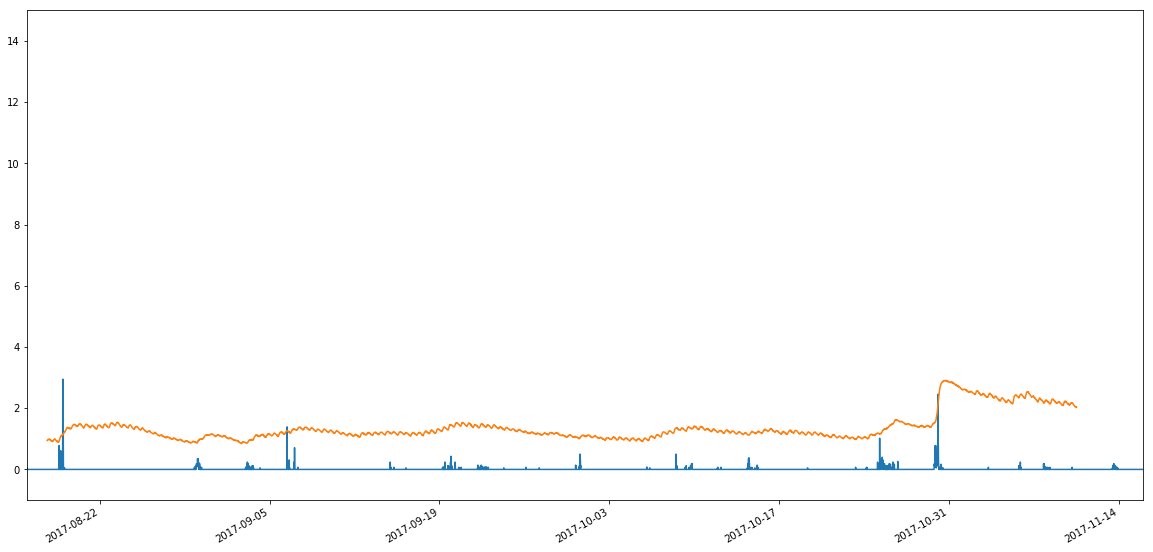

In [33]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well['GW_elevation_ft_(LSML)'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])

In [34]:
!ls -aF

./			     SHarris_PSet_7.html
../			     Tidal_data_8452660.csv
CO-OPS__8452660__hr (1).csv  Tidal_data_8452660_remaining.csv.csv
CO-OPS__8452660__hr.csv      Well33.ipynb
.git/			     Well55a.ipynb
.ipynb_checkpoints/	     Well56.ipynb
KRIPORTS37_weather.csv	     well master.ipynb
PSet_7.ipynb


**Lets try and see if tidal patterns have any effect on our transducer data**

In [35]:
%pwd

'/home/zonas/Documents/Projects/foglandpoint/PSet_7'

### fetching data from NOAA/CO-OPS via the [Data API](https://tidesandcurrents.noaa.gov/api/) 
specifically I am getting data from station [8452660](https://tidesandcurrents.noaa.gov/waterlevels.html?id=8452660&units=standard&bdate=20170501&edate=20171120&timezone=LST/LDT&datum=STND&interval=h&action=data)  
Note that we dont have the *Verified* (`tydl_wl_data`) data for November...seems like the data is updated monthly? we will have to use the predicted values from `tydl_pred_data`

In [36]:
tidal_water_levels = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=hourly_height&application=NOS.COOPS.TAC.WL&begin_date=20170501&end_date=20171120&datum=STND&station=8452660&time_zone=lst_ldt&units=english&format=csv'
tidal_predictions = 'https://tidesandcurrents.noaa.gov/api/datagetter?product=predictions&application=NOS.COOPS.TAC.WL&begin_date=20170501&end_date=20171120&datum=STND&station=8452660&time_zone=lst_ldt&units=english&interval=h&format=csv'

In [37]:
tydl_wl_data = pd.read_csv(tidal_water_levels, delimiter=',')
tydl_pred_data = pd.read_csv(tidal_predictions, delimiter=',')

In [38]:
print(tydl_wl_data.columns)
print(tydl_pred_data.columns)

Index(['Date Time', ' Water Level', ' Sigma', ' I', ' L '], dtype='object')
Index(['Date Time', ' Prediction'], dtype='object')


In [39]:
tydl_wl_data['Datetime'] = pd.to_datetime(tydl_wl_data['Date Time'])
tydl_wl_data = tydl_wl_data.set_index('Datetime')
tydl_wl_data.rename(columns={' Water Level': 'Water Level'}, inplace=True)
tydl_wl_data = tydl_wl_data.drop(('Date Time'), 1)

tydl_pred_data['Datetime'] = pd.to_datetime(tydl_pred_data['Date Time'])
tydl_pred_data = tydl_pred_data.set_index('Datetime')
tydl_pred_data.rename(columns={' Prediction': 'Prediction'}, inplace=True)
tydl_pred_data = tydl_pred_data.drop(('Date Time'), 1)

#write a for-loop for the above?

(736557.0, 736649.0)

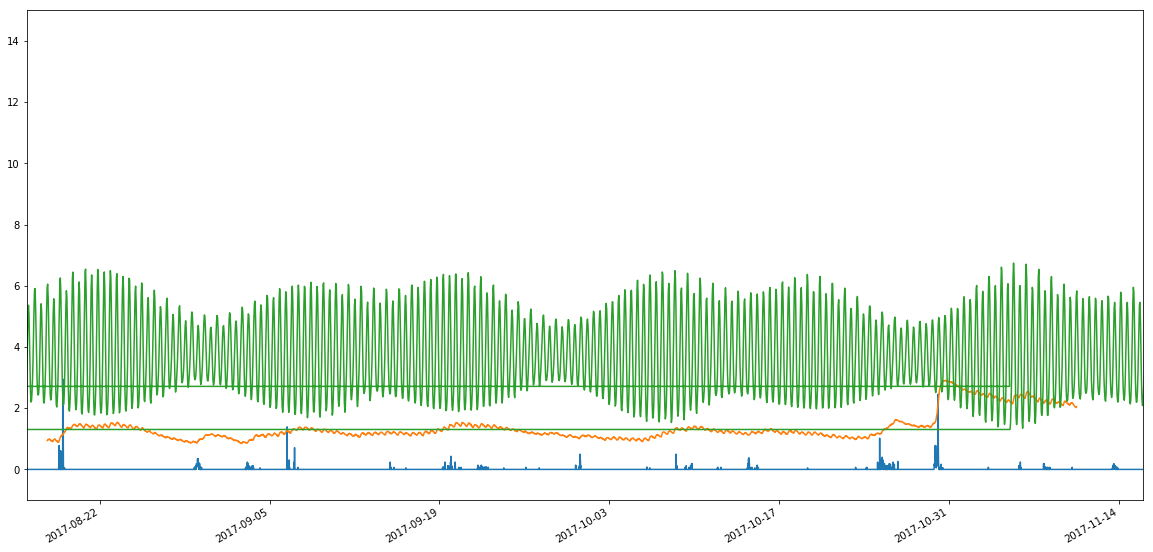

In [40]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well['GW_elevation_ft_(LSML)'])

ax3 = fig.add_subplot(1,1,1)
ax3.plot(tydl_pred_data['Prediction'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])

(736557.0, 736649.0)

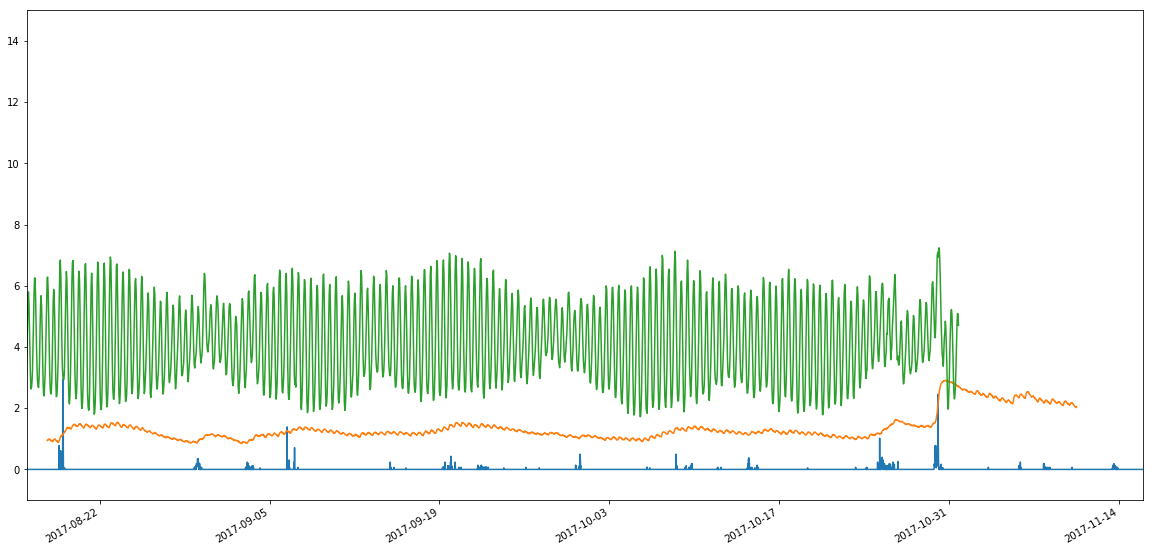

In [41]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,1,1)
ax1.plot(data_raw['rain'])

ax2 = fig.add_subplot(1,1,1)
ax2.plot(well['GW_elevation_ft_(LSML)'])

ax3 = fig.add_subplot(1,1,1)
ax3.plot(tydl_wl_data['Water Level'])

fig.autofmt_xdate()
plt.ylim([-1,15])
plt.xlim(['2017-08-16','2017-11-16'])